In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
data=pd.read_csv('data/건강검진2024.csv', encoding='cp949')
data

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석
0,2024,4831755,41,2,13,160,50,70.0,1.0,1.0,...,13.0,6.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
1,2024,1154608,41,2,11,155,60,74.9,1.0,1.0,...,10.0,14.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
2,2024,3318236,41,2,13,150,55,74.0,1.0,1.0,...,19.0,17.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
3,2024,3770599,41,1,16,160,70,89.0,1.0,1.0,...,26.0,28.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
4,2024,2634185,41,1,11,175,65,76.0,1.0,1.0,...,18.0,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2024,1945007,27,2,17,150,45,76.2,0.4,0.3,...,78.0,147.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN
999996,2024,2558884,28,1,12,160,70,86.1,0.7,0.7,...,18.0,255.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN
999997,2024,4441437,41,1,12,160,65,78.5,0.9,0.9,...,31.0,222.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN
999998,2024,4313591,30,1,8,175,95,105.0,1.5,1.5,...,53.0,300.0,1.0,0.0,1,0.0,NaN,NaN,NaN,0.0


In [64]:
data2=data.loc[:,['성별코드', '신장(5cm단위)',	'체중(5kg단위)', '허리둘레', '음주여부', '흡연상태']]
data3=data2.rename(columns={'성별코드':'성별', '신장(5cm단위)':'신장', '체중(5kg단위)':'체중'})
data3.loc[data3['성별']==1, ['성별']]='M'
data3.loc[data3['성별']==2, ['성별']]='F'
data3.loc[data3['음주여부']==0,['음주여부']]='Non-drinking'
data3.loc[data3['음주여부']==1,['음주여부']]='Drinking'
data3.loc[data3['흡연상태']==1,['흡연상태']]='Non-smoking'
data3.loc[data3['흡연상태']==2,['흡연상태']]='Quit-smoking'
data3.loc[data3['흡연상태']==3,['흡연상태']]='Smoking'
data3

C:\Users\it\AppData\Local\Temp\ipykernel_11692\2506664506.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'M' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data3.loc[data3['성별']==1, ['성별']]='M'
C:\Users\it\AppData\Local\Temp\ipykernel_11692\2506664506.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Non-drinking' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data3.loc[data3['음주여부']==0,['음주여부']]='Non-drinking'
C:\Users\it\AppData\Local\Temp\ipykernel_11692\2506664506.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Non-smoking' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data3.loc[data3['흡연상태']==1,['흡

,성별,신장,체중,허리둘레,음주여부,흡연상태
0,F,160,50,70.0,Drinking,Non-smoking
1,F,155,60,74.9,Drinking,Non-smoking
2,F,150,55,74.0,Drinking,Non-smoking
3,M,160,70,89.0,Drinking,Non-smoking
4,M,175,65,76.0,Drinking,Non-smoking
...,...,...,...,...,...,...
999995,F,150,45,76.2,Non-drinking,Non-smoking
999996,M,160,70,86.1,Non-drinking,Non-smoking
999997,M,160,65,78.5,Non-drinking,Smoking
999998,M,175,95,105.0,Non-drinking,Non-smoking


막대그래프 그리기
음주 여부 및 흡연상태 데이터 준비하기

In [65]:
drinking=data3.groupby(['성별','음주여부'])['음주여부'].count()
smoking=data3.groupby(['성별','흡연상태'])['흡연상태'].count()
drinking=drinking.to_frame(name='count')
smoking=smoking.to_frame(name='count')
drinking=drinking.reset_index()
smoking=smoking.reset_index()
drinking
smoking

,성별,흡연상태,count
0,F,Non-smoking,445993
1,F,Quit-smoking,17127
2,F,Smoking,18901
3,M,Non-smoking,197808
4,M,Quit-smoking,158399
5,M,Smoking,161654


In [66]:
import matplotlib.font_manager as fm
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

Text(0.5, 1.0, '흡연상태')

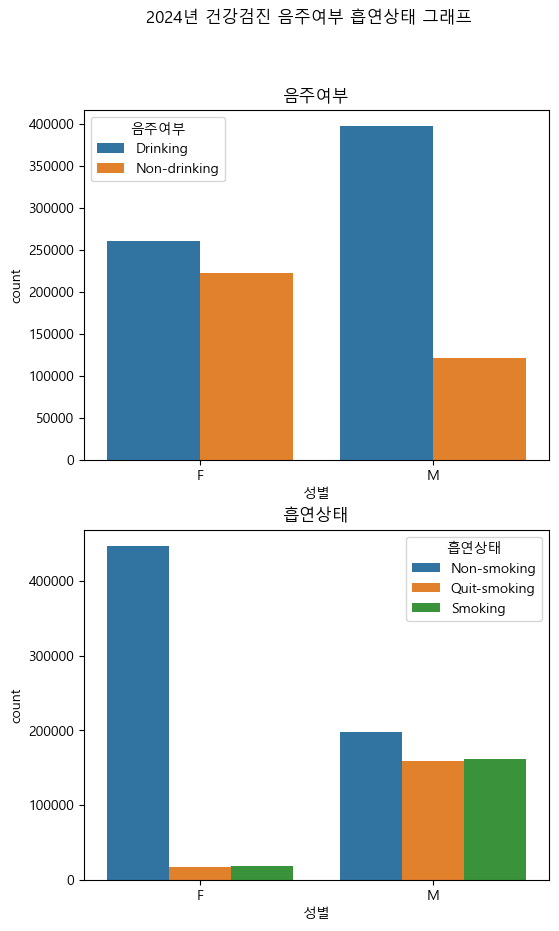

In [67]:
fig=plt.figure(figsize=(6,10))
area1=fig.add_subplot(2,1,1) #subplot전체 내부 플롯을 그려 ( 순서, 열 , 순서)
area2=fig.add_subplot(2,1,2)
ax1=sns.barplot(data=drinking, x='성별', y='count', hue='음주여부', ax=area1)
 #데이터에 넣는 데이터 프레임 hue는 범례이름
ax2=sns.barplot(data=smoking, x='성별', y='count', hue='흡연상태', ax=area2)

fig.suptitle("2024년 건강검진 음주여부 흡연상태 그래프")
area1.set_title('음주여부')
area2.set_title('흡연상태')



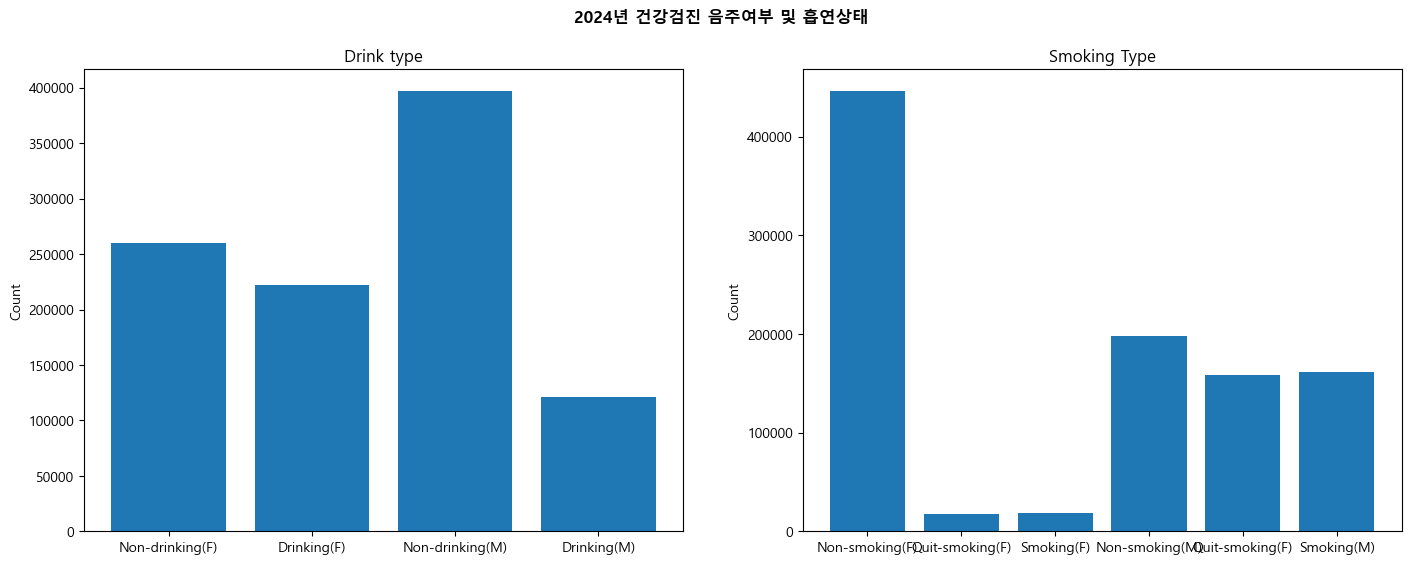

In [68]:
fig=plt.figure(figsize=(17,6))
fig.suptitle("2024년 건강검진 음주여부 및 흡연상태", fontweight='bold')
index=np.arange(4)
index2=np.arange(6)

fig.add_subplot(1,2,1)
plt.bar(index, drinking['count'])
plt.title('Drink type')
plt.ylabel('Count')
plt.xticks(index,['Non-drinking(F)','Drinking(F)', 'Non-drinking(M)','Drinking(M)'])


fig.add_subplot(1,2,2)
plt.bar(index2, smoking['count'])
plt.title('Smoking Type')
plt.ylabel('Count')
plt.xticks(index2,['Non-smoking(F)', 'Quit-smoking(F)', 'Smoking(F)', 'Non-smoking(M)', 'Quit-smoking(F)', 'Smoking(M)'])
plt.show()

In [69]:
male_data=data3.loc[data3.성별=='M',['성별', '신장', '체중', '허리둘레', '음주여부','흡연상태']]
female_data=data3.loc[data3.성별=='F',['성별', '신장', '체중', '허리둘레', '음주여부','흡연상태']]
male_data
female_data

,성별,신장,체중,허리둘레,음주여부,흡연상태
0,F,160,50,70.0,Drinking,Non-smoking
1,F,155,60,74.9,Drinking,Non-smoking
2,F,150,55,74.0,Drinking,Non-smoking
10,F,145,60,87.0,Non-drinking,Non-smoking
11,F,155,55,76.5,Drinking,Non-smoking
...,...,...,...,...,...,...
999989,F,165,65,75.0,Non-drinking,Non-smoking
999990,F,155,45,66.0,Non-drinking,Non-smoking
999992,F,145,50,73.3,Non-drinking,Non-smoking
999993,F,155,95,107.0,Non-drinking,Non-smoking


<Axes: title={'center': 'Seaborn strip plot graph'}, xlabel='신장', ylabel='체중'>

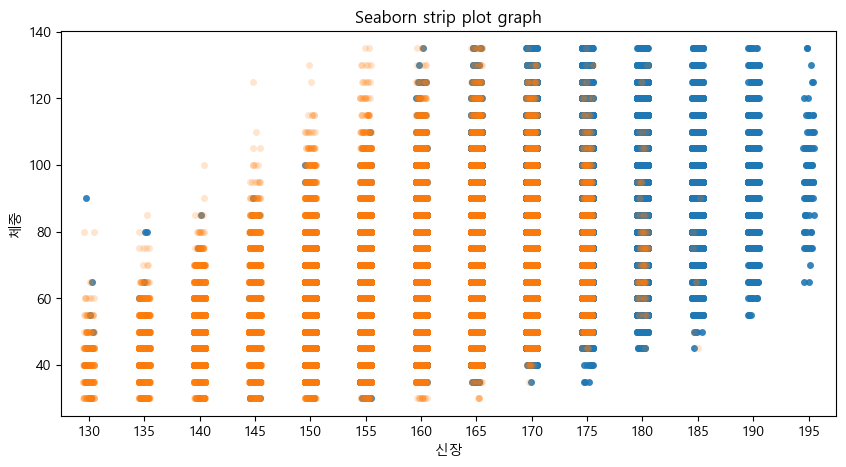

In [70]:
plt.figure(figsize=(10,5))
plt.title("Seaborn strip plot graph")
sns.stripplot(x='신장', y='체중', data=male_data, alpha=0.9)
sns.stripplot(x='신장', y='체중', data=female_data, alpha=0.2)

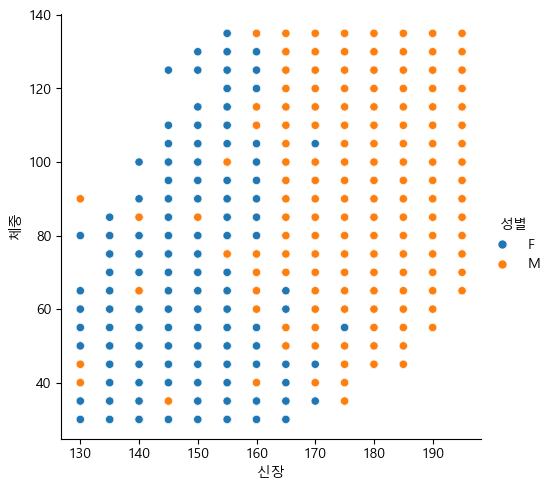

In [71]:
sns.relplot(x='신장', y='체중', data=data3, hue='성별')
plt.show()

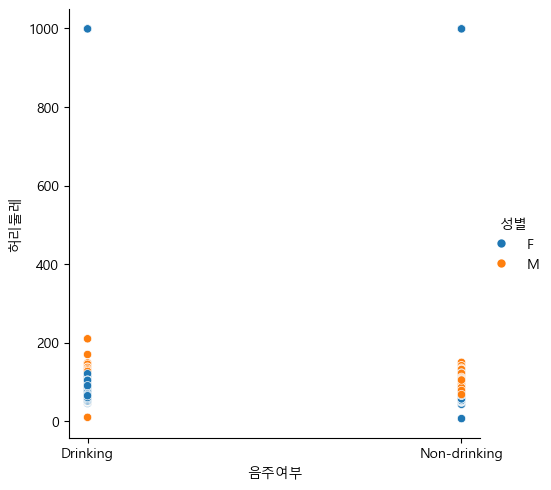

In [72]:
data4=data3.loc[:,['성별', '신장', '체중', '허리둘레', '음주여부','흡연상태']]
sns.relplot(data=data4, x='음주여부', y='허리둘레', hue='성별') #relplot x와 y사이의 관계 확인
plt.show()

In [73]:
sns.get_dataset_names()
tips=sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


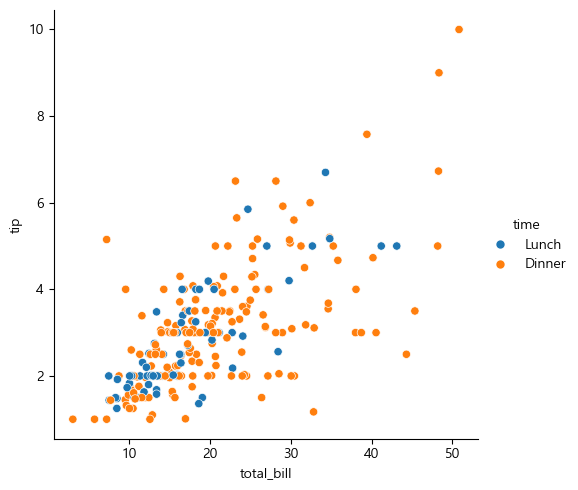

In [74]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='time')

히스토그램 그리기

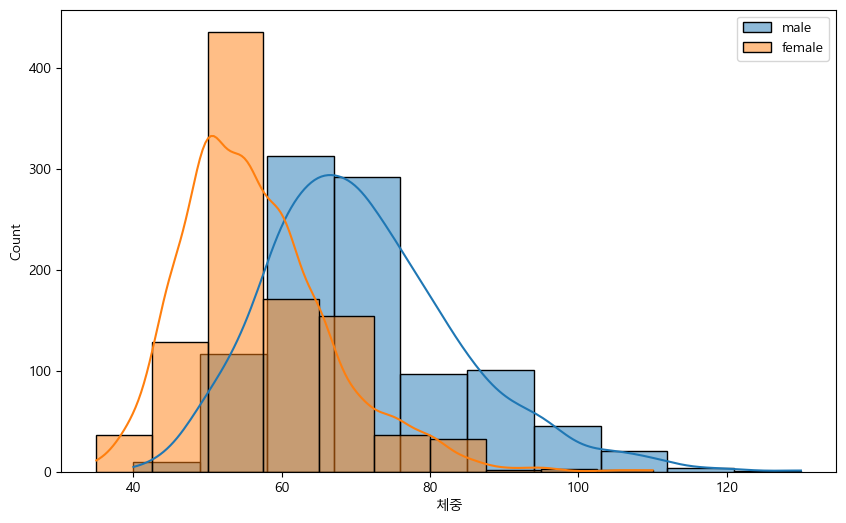

In [75]:
male_data=male_data[:1000] #0부터 999개
female_data=female_data[:1000]
plt.figure(figsize=(10,6))
sns.histplot(male_data['체중'], bins=10, kde=True, label='male') #bin은 본인 데이터에 맞게, 구간을 몇 개로 나눌건가
sns.histplot(female_data['체중'], bins=10, alpha=0.5, kde=True, label='female')

plt.legend()

data5했으면 좋았을텐데...ㅇㅁㅇ.. 그래서 수정!!

In [76]:
data5=data3[:3000]

<Axes: xlabel='허리둘레', ylabel='음주여부'>

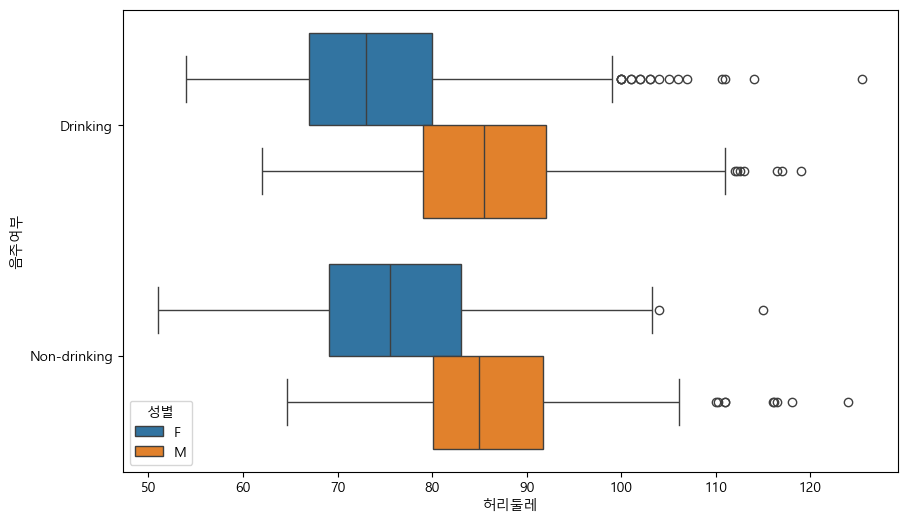

In [77]:

plt.figure(figsize=(10,6))
sns.boxplot(data=data5, x='허리둘레', y='음주여부', hue='성별')

In [78]:
data3

,성별,신장,체중,허리둘레,음주여부,흡연상태
0,F,160,50,70.0,Drinking,Non-smoking
1,F,155,60,74.9,Drinking,Non-smoking
2,F,150,55,74.0,Drinking,Non-smoking
3,M,160,70,89.0,Drinking,Non-smoking
4,M,175,65,76.0,Drinking,Non-smoking
...,...,...,...,...,...,...
999995,F,150,45,76.2,Non-drinking,Non-smoking
999996,M,160,70,86.1,Non-drinking,Non-smoking
999997,M,160,65,78.5,Non-drinking,Smoking
999998,M,175,95,105.0,Non-drinking,Non-smoking


<Axes: xlabel='흡연상태', ylabel='count'>

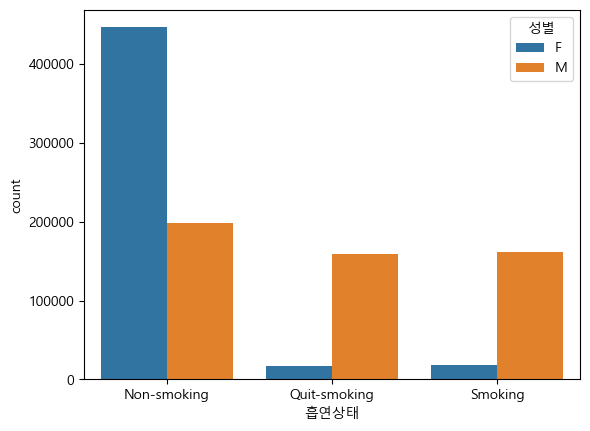

In [79]:
sns.countplot(data=data3, x='흡연상태', hue='성별')

<Axes: xlabel='성별', ylabel='허리둘레'>

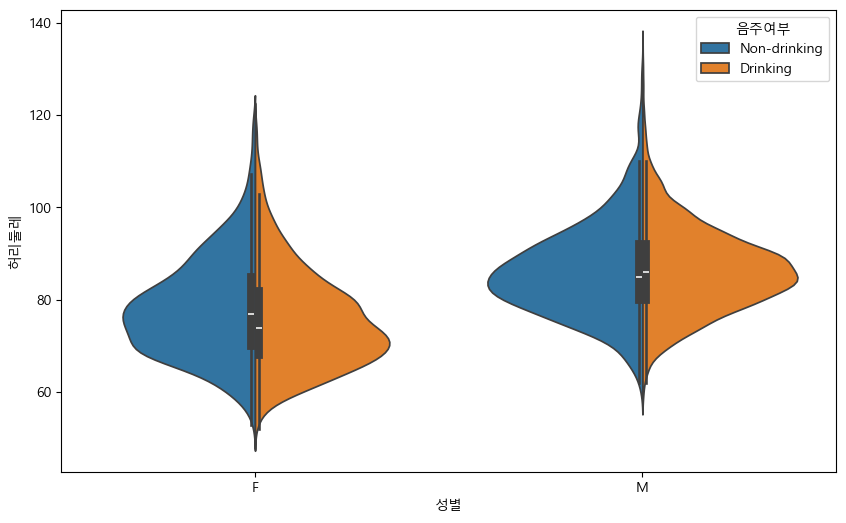

In [87]:
# data3
data6=data3[10000:20000] # 이렇게 셀렉도 가능
plt.figure(figsize=(10,6))
sns.violinplot(data=data6, x='성별', y='허리둘레', hue='음주여부', split=True)
# sns.violinplot(data=data6, y='성별', x='체중', hue='음주여부') 가로됨

In [95]:
data7=data3.loc[:, ['성별', '신장', '체중', '허리둘레']]
data7.info()
corr_df=data7.corr(numeric_only=True) #숫자가 아닌 값이 들어가면 에러가 뜨니까 너멀릭 넣어
corr_df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   성별      1000000 non-null  object 
 1   신장      1000000 non-null  int64  
 2   체중      1000000 non-null  int64  
 3   허리둘레    999505 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.5+ MB


,신장,체중,허리둘레
신장,1.000000,0.656266,0.346986
체중,0.656266,1.000000,0.809002
허리둘레,0.346986,0.809002,1.000000


<Axes: >

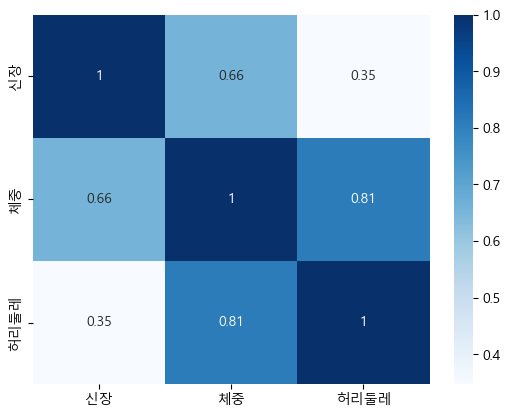

In [102]:
plt.Figure(figsize=(10,6))
sns.heatmap(corr_df, annot=True, cmap='Blues') #낮은게 앞쪽, 높은게 뒤


In [109]:
data.head(1000)

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석
0,2024,4831755,41,2,13,160,50,70.0,1.0,1.0,...,13.0,6.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
1,2024,1154608,41,2,11,155,60,74.9,1.0,1.0,...,10.0,14.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
2,2024,3318236,41,2,13,150,55,74.0,1.0,1.0,...,19.0,17.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
3,2024,3770599,41,1,16,160,70,89.0,1.0,1.0,...,26.0,28.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
4,2024,2634185,41,1,11,175,65,76.0,1.0,1.0,...,18.0,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024,4923876,41,1,13,165,80,94.0,1.0,1.0,...,31.0,28.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
996,2024,3815582,41,1,9,170,85,98.0,1.0,1.0,...,53.0,50.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
997,2024,4678243,41,2,12,150,65,88.0,1.0,1.0,...,29.0,36.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
998,2024,3878196,41,1,7,170,75,84.0,1.0,1.0,...,20.0,25.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN


In [111]:
sns.get_dataset_names()
healthexp=sns.load_dataset('healthexp')
healthexp

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


In [ ]:
sns.get_dataset_names()
diamonds=sns.load_dataset('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


숫자랑 문자랑 섞여있어 numeric_only=True 해줘

In [113]:
corr1=diamonds.corr(numeric_only=True)
corr1

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

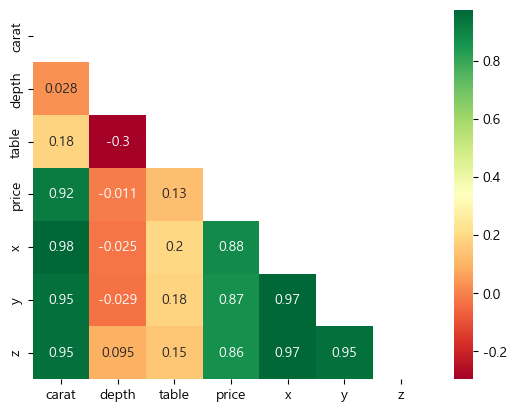

In [121]:
up_map=np.triu(corr1) #triu를 하면 아래에 0이 되고 , tril을 하면 위에 0이 되고 -> 위쪽에 마스크 아래 마스크씌우는 격
# up_map
sns.heatmap(corr1, cmap='RdYlGn', annot=True, mask=up_map)

C:\Users\it\AppData\Local\Temp\ipykernel_11692\4028942678.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


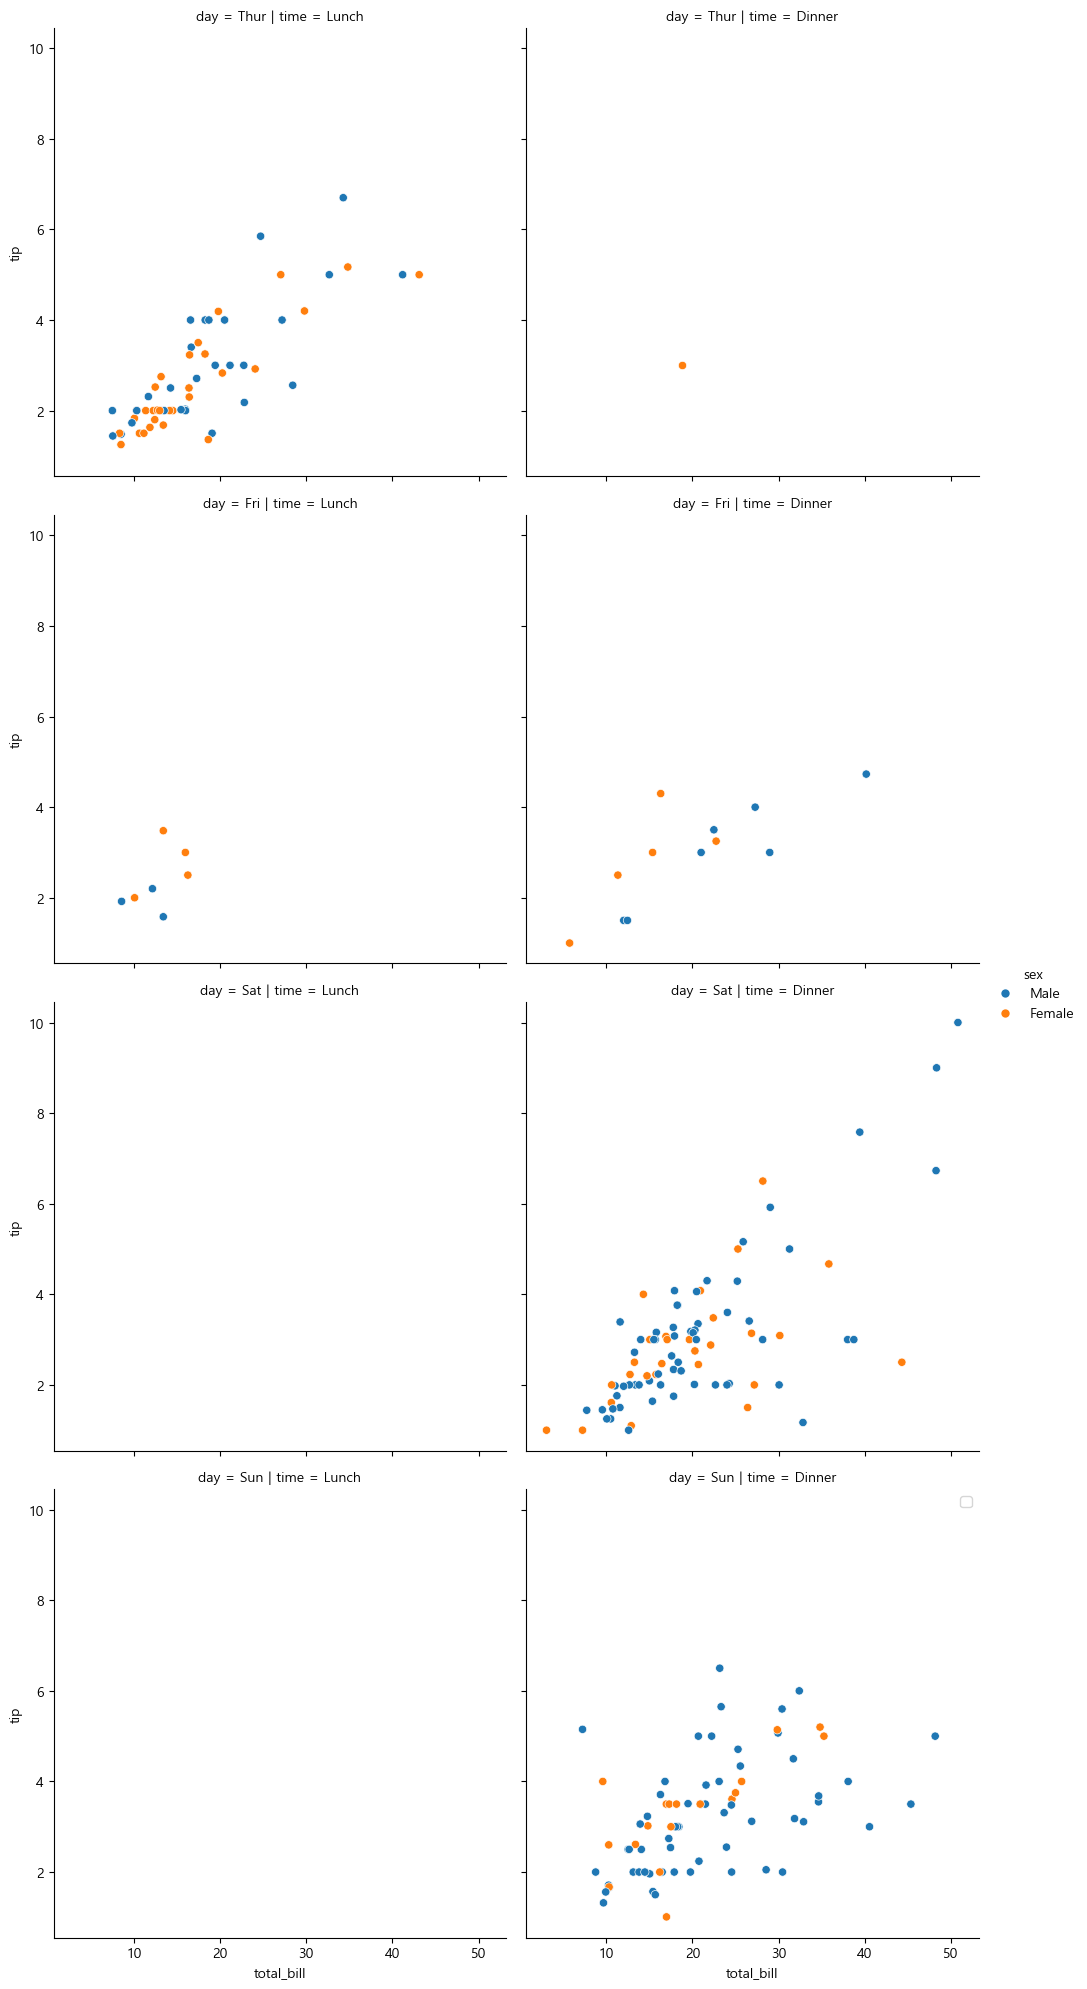

In [129]:
sns.relplot(x='total_bill', y='tip', hue='sex', data=tips, col='time', row='day')
plt.legend()

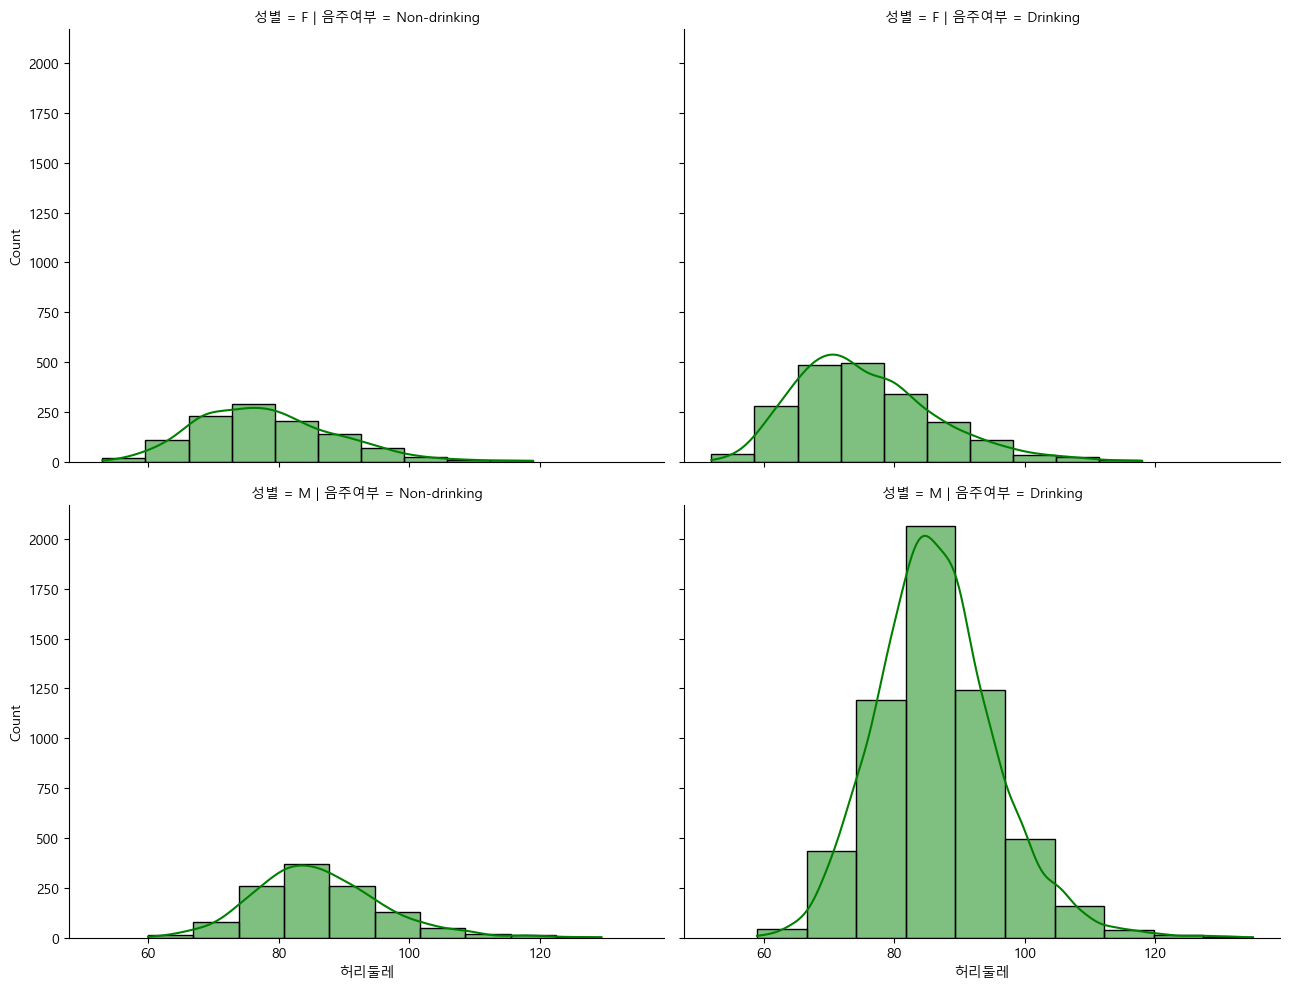

In [136]:
data8=data3[10000:20000]
# data8
fg=sns.FacetGrid(data8, col='음주여부', row='성별', height=5, aspect=1.3)
fg.map(sns.histplot, '허리둘레', bins=10, color='g', kde=True)
plt.show()

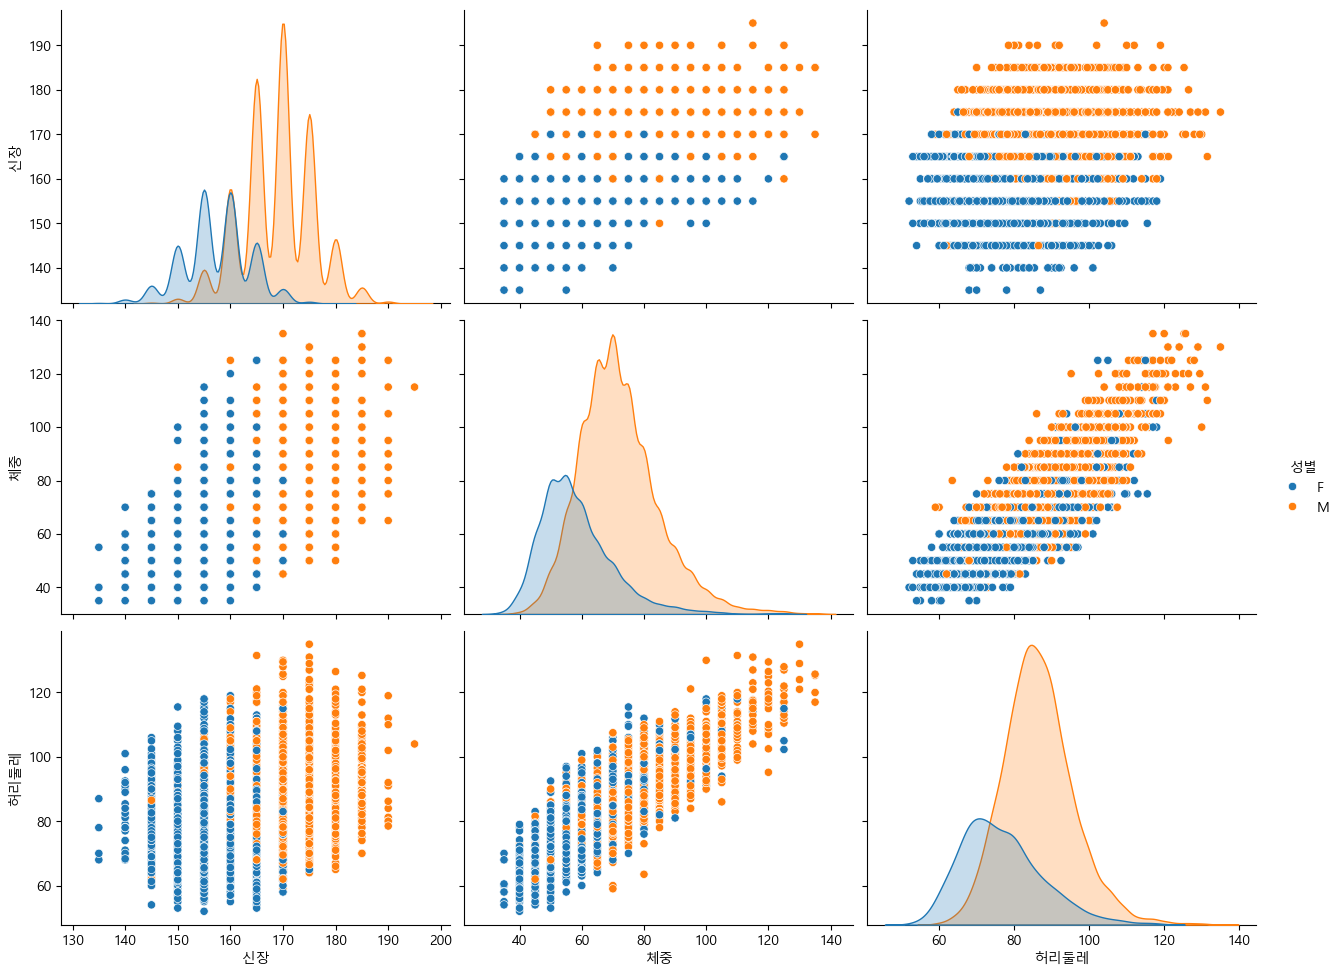

In [138]:
sns.pairplot(data8, height=3.3, hue='성별', aspect=1.3)
plt.show()

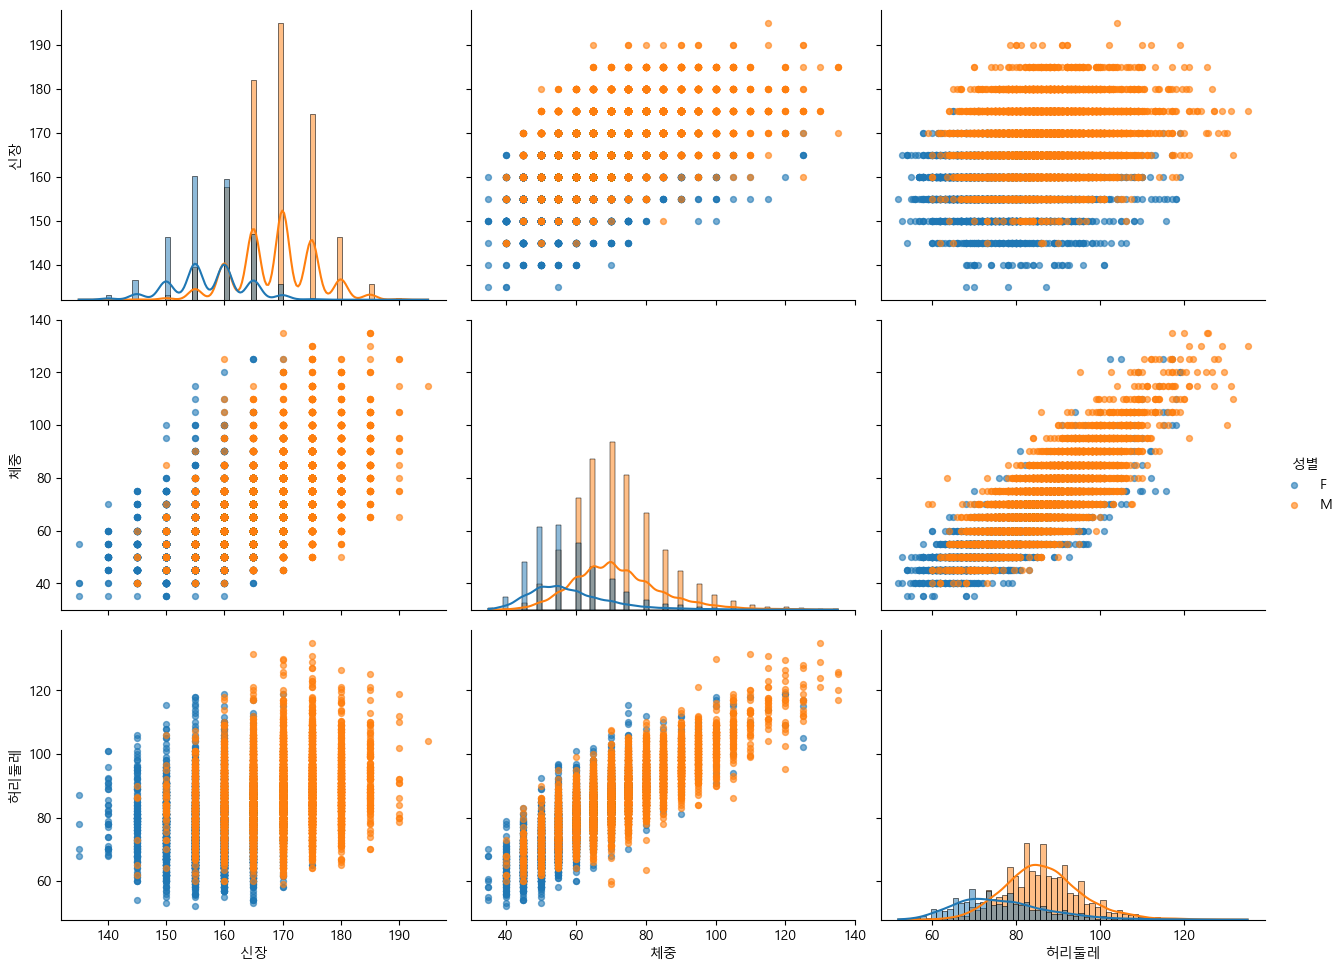

In [143]:
g=sns.PairGrid(data8, height=3.3, hue='성별', aspect=1.3)
g.map_diag(sns.histplot, kde=True)
g.map_offdiag(plt.scatter, s=18, alpha=0.6)
g.add_legend()
plt.show()